In [12]:
import datetime as dt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
#1.Merge the datasets Customers,Product Hierarchy and Transactions as Customer_Final.Ensure to keep all customers who have done transactions with us&select the join type accordingly.
customer=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/REtail case study 1/Customer.csv')
prod_cat_info=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/REtail case study 1/prod_cat_info.csv')
Transaction=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/REtail case study 1/Transactions.csv')

In [14]:
merge1=pd.merge(left=Transaction, right=prod_cat_info,left_on=["prod_cat_code","prod_subcat_code"],right_on=["prod_cat_code","prod_sub_cat_code"],how="left")
Customer_Final=pd.merge(left=merge1,right=customer,left_on='cust_id',right_on='customer_Id',how='left')
Customer_Final.drop(columns=['customer_Id','prod_sub_cat_code'],inplace=True)
Customer_Final.drop_duplicates(inplace=True)

In [15]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28/02/14,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27/02/14,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24/02/14,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24/02/14,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23/02/14,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25/01/11,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25/01/11,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25/01/11,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25/01/11,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0


In [16]:
#2. Prepare a summary report for the merged data set.
#a. Get the column names and their corresponding data types
Customer_Final.dtypes


transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
DOB                  object
Gender               object
city_code           float64
dtype: object

In [17]:
#b. Top/Bottom 10 observations
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28/02/14,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27/02/14,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24/02/14,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24/02/14,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23/02/14,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
5,97439039119,272357,23/02/14,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,09-10-1982,F,6.0
6,45649838090,273667,22/02/14,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,29-05-1981,M,9.0
7,22643667930,271489,22/02/14,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,21-04-1971,M,9.0
8,79792372943,275108,22/02/14,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,04-11-1971,F,8.0
9,50076728598,269014,21/02/14,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,27-11-1979,F,3.0


In [18]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,25/01/11,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,10-08-1976,M,8.0
23044,14787475597,273982,25/01/11,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,12-10-1991,M,4.0
23045,50691119572,273031,25/01/11,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,17-01-1980,F,8.0
23046,40893803228,272049,25/01/11,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,28-06-1975,F,6.0
23047,30856003613,266866,25/01/11,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,18-04-1974,M,4.0
23048,94340757522,274550,25/01/11,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25/01/11,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25/01/11,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25/01/11,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0
23052,77960931771,271961,25/01/11,11,5,1,447,46.935,493.935,TeleShop,Books,Children,15-01-1982,M,1.0


In [19]:
#c.“Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
def five_pt_summary(x):
    return pd.Series([x.min(),x.quantile(0.25),x.median(),x.quantile(0.75),x.max()],index=['min','Q1','median','Q3','max'])
    

In [20]:
Customer_Final.select_dtypes(['int64','float64']).apply(lambda x:five_pt_summary(x))

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
min,3.268991e+06,266783.00,1.0,1.0,-5.0,-1499.0,7.3500,-8270.925,1.0
Q1,2.493315e+10,268935.00,3.0,2.0,1.0,312.0,98.2800,762.450,3.0
median,5.009188e+10,270980.50,5.0,4.0,3.0,710.0,199.0800,1756.950,5.0
Q3,7.532632e+10,273114.25,10.0,5.0,4.0,1109.0,365.7675,3570.255,8.0
max,9.998755e+10,275265.00,12.0,6.0,5.0,1500.0,787.5000,8287.500,10.0


In [21]:
#d. Frequency tables for all the categorical variables
for column in Customer_Final.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=Customer_Final[column], columns='count'))

col_0,count
tran_date,
01/01/12,12
01/01/13,19
01/01/14,31
01/02/11,27
01/02/12,24
...,...
31/10/12,15
31/10/13,23
31/12/11,15


col_0,count
Store_type,
Flagship store,4575
MBR,4660
TeleShop,4501
e-Shop,9304


col_0,count
prod_cat,
Bags,1997
Books,6066
Clothing,2960
Electronics,4895
Footwear,2996
Home and kitchen,4126


col_0,count
prod_subcat,
Academic,966
Audio and video,952
Bath,1022
Cameras,985
Children,1035
Comics,1030
Computers,958
DIY,989
Fiction,1043


col_0,count
DOB,
01-01-1972,5
01-01-1978,4
01-01-1979,3
01-01-1980,10
01-01-1981,4
...,...
29-12-1988,3
29-12-1989,3
29-12-1990,8


col_0,count
Gender,
F,11227
M,11804


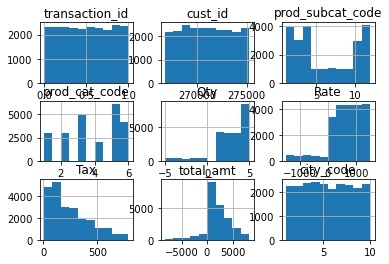

In [22]:
#3. Generate histograms for all continuous variables and frequency bars for categorical variables.
Customer_Final.select_dtypes(['int64','float64']).hist()
plt.show()


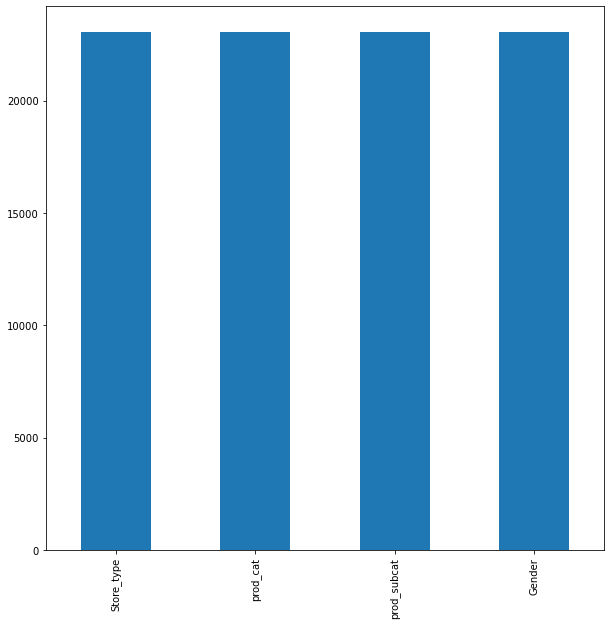

In [23]:
Customer_Final['tran_date']=pd.to_datetime(Customer_Final.tran_date,format='%d/%m/%y')
Customer_Final['DOB']=pd.to_datetime(Customer_Final.DOB,format='%d-%m-%Y')
plt.figure( figsize = (10, 10) )
Customer_Final.select_dtypes(['object']).count().plot(kind='bar')
plt.show()

In [24]:
#4
bb=Customer_Final.sort_values(by=['tran_date'],ascending=False,ignore_index=True)

bb=pd.to_datetime(bb.tran_date,format='%d/%m/%y')

In [25]:
(bb.loc[1]-bb.loc[23039]).days

1129

In [26]:
(Customer_Final.total_amt.loc[Customer_Final.total_amt<0]).count()

2164

In [27]:
#5
pd.crosstab(Customer_Final.prod_cat ,Customer_Final.Gender).sort_values(by=['M','F'],ascending=False)

Gender,F,M
prod_cat,,
Books,2946,3116
Electronics,2328,2567
Home and kitchen,1993,2132
Clothing,1439,1518
Footwear,1528,1467
Bags,993,1004


In [28]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0


In [29]:
#6
maximum=Customer_Final.groupby('city_code').Gender.count().reset_index().sort_values(by='Gender',ascending=False)
maximum['Perc_of_Gender']=(maximum['Gender']/Customer_Final.Gender.count())*100
maximum.iloc[0].reset_index()

,index,3
0,city_code,4.000000
1,Gender,2422.000000
2,Perc_of_Gender,10.516261


In [30]:
#7 Which store type sells the maximum products by value and by quantity?

In [31]:
store=Customer_Final.groupby('Store_type')['Qty','total_amt'].sum().sort_values(by=['Qty','total_amt'],ascending=False).reset_index()
store.iloc[0].reset_index()

<ipython-input-31-df0023c79600>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store=Customer_Final.groupby('Store_type')['Qty','total_amt'].sum().sort_values(by=['Qty','total_amt'],ascending=False).reset_index()


,index,0
0,Store_type,e-Shop
1,Qty,22790
2,total_amt,19842623.125


In [32]:
#8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [33]:
amt=pd.crosstab(index=Customer_Final.Store_type,columns=Customer_Final.prod_cat,values=Customer_Final.total_amt,aggfunc='sum')
amt1=amt.loc[['Flagship store'],['Clothing','Electronics']].reset_index().sum()
amt2=amt1.Clothing +amt1.Electronics
print('The total amount earned from "Electronics"&"Clothing" categories from Flagship Stores is:',amt2)

The total amount earned from "Electronics"&"Clothing" categories from Flagship Stores is: 3409559.2700000005


In [34]:
#9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [35]:
sum=Customer_Final.groupby(['prod_cat','Gender']).total_amt.sum().reset_index()
sum.loc[(sum.prod_cat=='Electronics')&(sum.Gender=='M')]

,prod_cat,Gender,total_amt
7,Electronics,M,5711351.62


In [36]:
#10.How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [37]:
trans=(Customer_Final.loc[Customer_Final.total_amt>=0]).groupby('cust_id')['transaction_id'].nunique().reset_index()
trans.cust_id.loc[trans.transaction_id>10].count()

6

In [38]:
#11. For all customers aged between 25 - 35, find out:

In [39]:
Customer_Final['DOB']=pd.to_datetime(Customer_Final['DOB'],format='%d-%m-%Y')
now=dt.date.today()
Customer_Final['age']= (now.year - Customer_Final['DOB'].dt.year) - ((now.month - Customer_Final['DOB'].dt.month)<0)

In [40]:
#a. What was the total amount spent for “Electronics” and “Books” product categories?
result=Customer_Final.loc[(Customer_Final.age>25)&(Customer_Final.age<35)].loc[(Customer_Final.prod_cat=='Books')|(Customer_Final.prod_cat=='Electronics')]
result_1=result.groupby(['prod_cat'])['total_amt'].sum().reset_index()
print('Total amount spent for “Electronics” and “Books is: ',result_1.total_amt.sum())


Total amount spent for “Electronics” and “Books is:  6293341.860000001


In [41]:
#b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
Customer_Final['DOB']=pd.to_datetime(Customer_Final['DOB'],format='%d-%m-%Y')
now=dt.date.today()
Customer_Final['age']= (now.year - Customer_Final['DOB'].dt.year) - ((now.month - Customer_Final['DOB'].dt.month)<0)


In [42]:
Customer_Final.tran_date=pd.to_datetime(Customer_Final.tran_date,format='%d/%m/%y')
a='2014-01-01'
b='2014-03-01'
trans_amt=Customer_Final.sort_values(by='tran_date',ascending=True).loc[(Customer_Final.tran_date>pd.to_datetime(a,format='%Y-%m-%d'))&(Customer_Final.tran_date<pd.to_datetime(b,format='%Y-%m-%d'))]
trans_amt[['cust_id','tran_date','total_amt']]
print('Total amount spent by these customers between 1st,Jan,2014 to 1st,Mar,2014 is: ',trans_amt.total_amt.sum())

Total amount spent by these customers between 1st,Jan,2014 to 1st,Mar,2014 is:  2175087.525
